<head>
    <h2 style='text-align:center;font-family:helvetica'><b>2019 Amazon Sales Data Analysis🛒📈📉</b></h2><br>
    <hr>
</head>
<body>
    <div style='font-size:20px;font-family:helvetica'> The objective of this notebook is to perform Exploratory Data Analysis on the Amazon Sales Dataset and discover key    product and monthly trends.
    </div>
</body>

In [1]:
# Importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import cufflinks as cf
import os

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
init_notebook_mode(connected=True)
cf.go_offline(True)

In [3]:
amazon_df = pd.DataFrame()

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        temp_df = pd.read_csv(os.path.join(dirname, filename))
        amazon_df = pd.concat([amazon_df,temp_df],ignore_index=True)

In [5]:
amazon_df = amazon_df.sort_values('Order Date').reset_index(drop = True)

In [6]:
amazon_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


In [7]:
amazon_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
renamed_columns = {'Order ID':'Order_ID', 'Quantity Ordered':'Qty_Ordered','Price Each':'Price','Order Date':'Order_Date','Purchase Address':'Purchase_Address'}
amazon_df = amazon_df.rename(renamed_columns,axis=1)

In [10]:
amazon_df.columns

Index(['Order_ID', 'Product', 'Qty_Ordered', 'Price', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

Proceeding to the EDA

In [11]:
features = amazon_df.isnull().sum().index.sort_values(ascending=False)
missing_data = pd.Series(amazon_df.isnull().sum().values).sort_values(ascending=False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

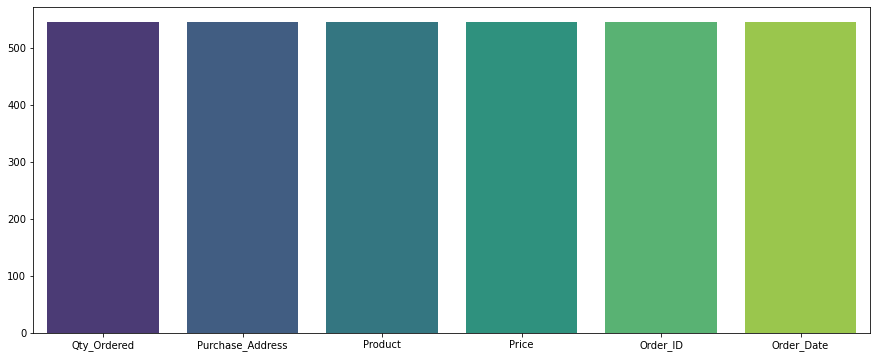

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(features,missing_data,palette='viridis')

In [13]:
amazon_df[amazon_df.isna()]

,Order_ID,Product,Qty_Ordered,Price,Order_Date,Purchase_Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186845,NaN,NaN,NaN,NaN,NaN,NaN
186846,NaN,NaN,NaN,NaN,NaN,NaN
186847,NaN,NaN,NaN,NaN,NaN,NaN
186848,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
amazon_df = amazon_df.dropna()

Converting the datatypes of each column to the appropriate kind

In [15]:
numeric_fields = ['Order_ID','Qty_Ordered','Price']
for field in numeric_fields:
    amazon_df[field] = pd.to_numeric(amazon_df[field], errors='coerce')

In [16]:
amazon_df.isnull().sum()

Order_ID            355
Product               0
Qty_Ordered         355
Price               355
Order_Date            0
Purchase_Address      0
dtype: int64

In [17]:
amazon_df[amazon_df['Order_ID'].isna()]

,Order_ID,Product,Qty_Ordered,Price,Order_Date,Purchase_Address
185950,NaN,Product,NaN,NaN,Order Date,Purchase Address
185951,NaN,Product,NaN,NaN,Order Date,Purchase Address
185952,NaN,Product,NaN,NaN,Order Date,Purchase Address
185953,NaN,Product,NaN,NaN,Order Date,Purchase Address
185954,NaN,Product,NaN,NaN,Order Date,Purchase Address
...,...,...,...,...,...,...
186300,NaN,Product,NaN,NaN,Order Date,Purchase Address
186301,NaN,Product,NaN,NaN,Order Date,Purchase Address
186302,NaN,Product,NaN,NaN,Order Date,Purchase Address
186303,NaN,Product,NaN,NaN,Order Date,Purchase Address


I was looking to decrease the space occupied but found some junk data in the dataframe. Dropping these rows as well.

In [18]:
amazon_df = amazon_df.dropna()

In [19]:
amazon_df = amazon_df.set_index('Order_Date')
amazon_df.index = pd.to_datetime(amazon_df.index)

## Creating time series based features

In [20]:
amazon_df['Month'] = amazon_df.index.month
amazon_df['Day_Of_Week'] = amazon_df.index.day_of_week
amazon_df['Total_Spend'] = amazon_df.Qty_Ordered * amazon_df.Price
amazon_df['State_Code'] = amazon_df.Purchase_Address.apply(lambda row: row.split(", ")[-1].split(" ")[0])

In [21]:
amazon_df

,Order_ID,Product,Qty_Ordered,Price,Purchase_Address,Month,Day_Of_Week,Total_Spend,State_Code
Order_Date,,,,,,,,,
2019-01-01 03:07:00,147268.0,Wired Headphones,1.0,11.99,"9 Lake St, New York City, NY 10001",1,1,11.99,NY
2019-01-01 03:40:00,148041.0,USB-C Charging Cable,1.0,11.95,"760 Church St, San Francisco, CA 94016",1,1,11.95,CA
2019-01-01 04:56:00,149343.0,Apple Airpods Headphones,1.0,150.00,"735 5th St, New York City, NY 10001",1,1,150.00,NY
2019-01-01 05:53:00,149964.0,AAA Batteries (4-pack),1.0,2.99,"75 Jackson St, Dallas, TX 75001",1,1,2.99,TX
2019-01-01 06:03:00,149350.0,USB-C Charging Cable,2.0,11.95,"943 2nd St, Atlanta, GA 30301",1,1,23.90,GA
...,...,...,...,...,...,...,...,...,...
2019-12-31 23:42:00,298406.0,AAA Batteries (4-pack),2.0,2.99,"30 Elm St, San Francisco, CA 94016",12,1,5.98,CA
2019-12-31 23:42:00,297481.0,AA Batteries (4-pack),1.0,3.84,"82 Hill St, Dallas, TX 75001",12,1,3.84,TX
2019-12-31 23:45:00,317048.0,AAA Batteries (4-pack),2.0,2.99,"743 Adams St, San Francisco, CA 94016",12,1,5.98,CA


## Exploring the dataset using Jan data as a sample

In [22]:
amazon_df_jan = amazon_df[(amazon_df.index > '2019-01-01 00:00:00')&(amazon_df.index < '2019-02-01 00:00:00')]

In [23]:
product_name = amazon_df_jan['Product'].value_counts().index
product_count = amazon_df_jan['Product'].value_counts().values

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Product vs Quantity sold in January 2019 - Top 15 products')

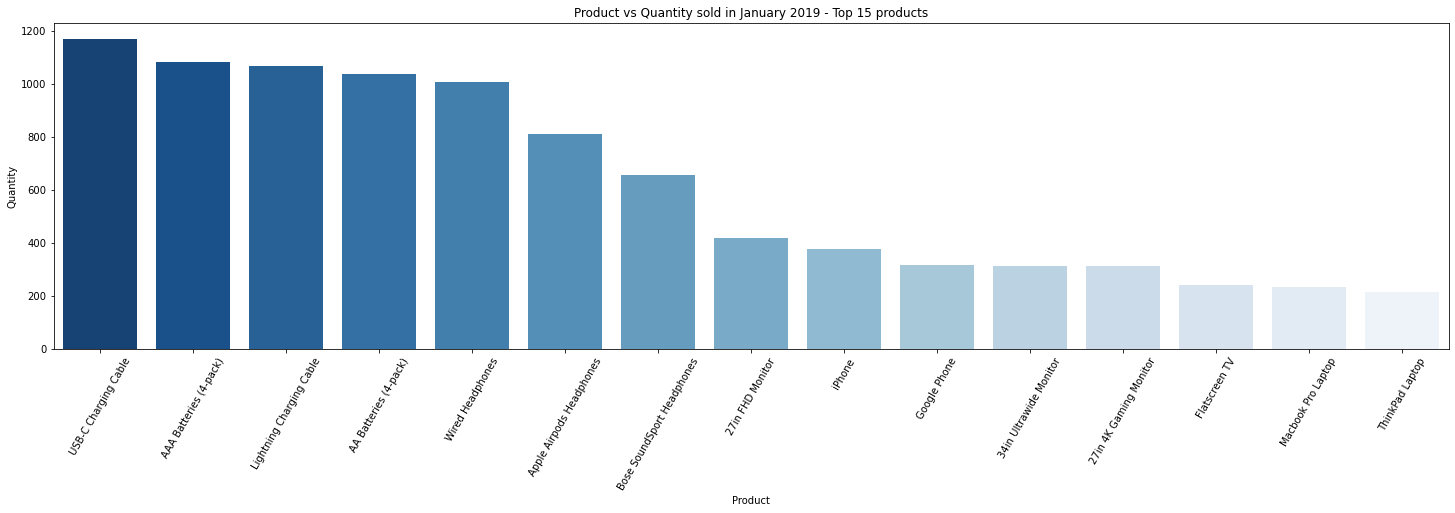

In [24]:
plt.figure(figsize=(25,6))
sns.barplot(product_name[:15],product_count[:15],palette='Blues_r')
plt.xticks(rotation=60)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Product vs Quantity sold in January 2019 - Top 15 products')

Text(0.5, 1.0, 'Product vs Total Sales in January 2019 - Top 15 Products')

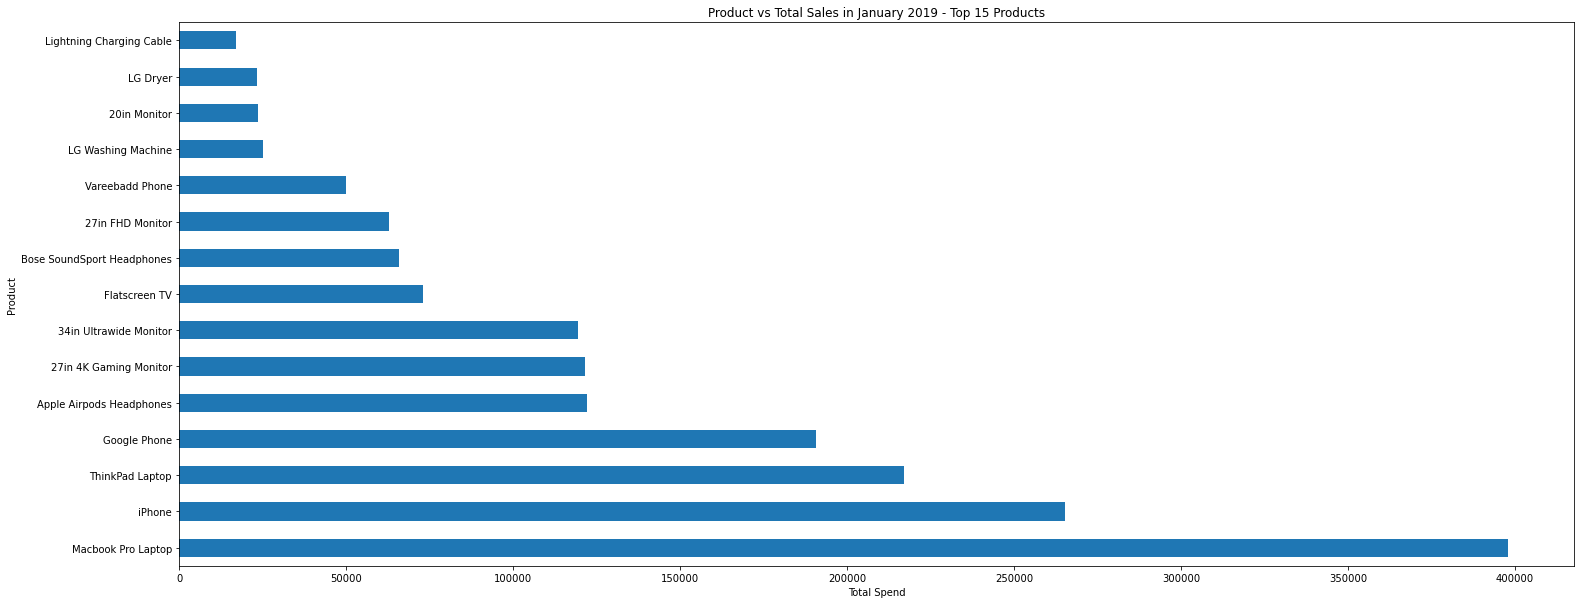

In [25]:
amazon_df_jan.groupby('Product')['Total_Spend'].sum().sort_values(ascending=False)[:15].plot(figsize=(25,10),kind='barh')
plt.xlabel('Total Spend')
plt.ylabel('Product')
plt.title('Product vs Total Sales in January 2019 - Top 15 Products')

In [26]:
state = {'State_Code':amazon_df_jan.groupby('State_Code')['Total_Spend'].sum().sort_values(ascending = False).index.tolist()}
value = {'Total_Spend':amazon_df_jan.groupby('State_Code')['Total_Spend'].sum().sort_values(ascending = False).values.tolist()}

In [27]:
state.update(value)

In [28]:
print(state)

{'State_Code': ['CA', 'NY', 'TX', 'MA', 'GA', 'WA', 'OR', 'ME'], 'Total_Spend': [720705.36, 259250.67, 229334.64, 199761.6, 149159.54, 140542.06, 92123.77, 22708.8]}


In [29]:
state_analysis_jan_df = pd.DataFrame.from_dict(state)

In [30]:
state_analysis_jan_df

,State_Code,Total_Spend
0,CA,720705.36
1,NY,259250.67
2,TX,229334.64
3,MA,199761.60
4,GA,149159.54
5,WA,140542.06
6,OR,92123.77
7,ME,22708.80


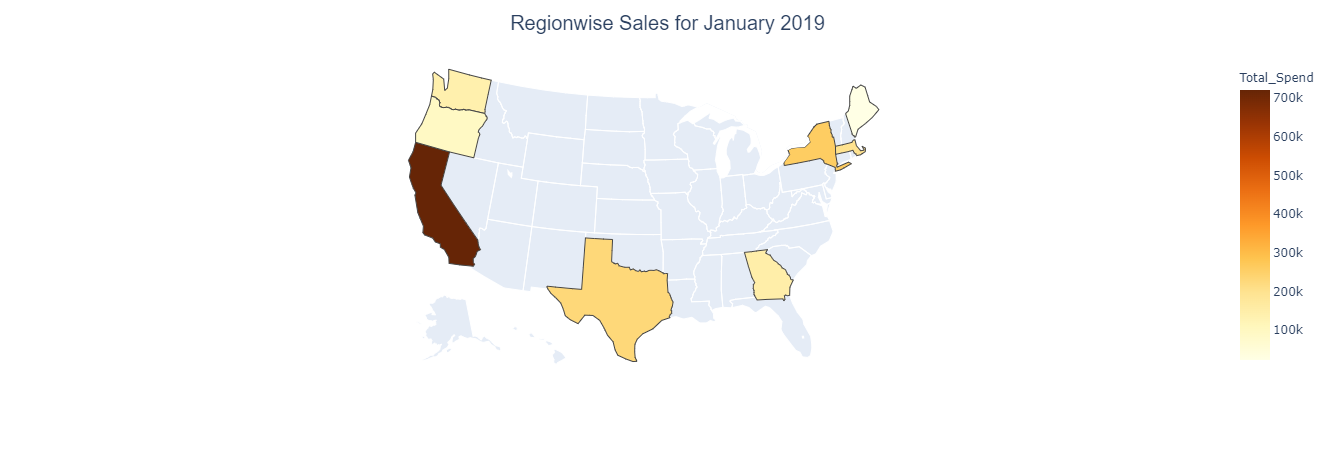

In [31]:
fig = px.choropleth(state_analysis_jan_df,
                    locations='State_Code', 
                    locationmode="USA-states",
                    scope="usa",
                    color= 'Total_Spend',
                    color_continuous_scale="YlOrBr")                    
fig.update_layout(title_text = 'Regionwise Sales for January 2019', title_font_family = 'Arial',title_font_size = 20, title_x = 0.5)

## Ideas to explore
- Region based analysis - Based on Purchase Address
- Product based analysis 
  - Most revenue generated
  - Month of purchase
  - Inflation check - To see whether the price has increased over the year